2. ネットワーク分析・可視化の具体例


2.1 入力

ネットワークには大きく分けて、現実の対象間の関係などから得られた実ネットワークと、人工的に生成した人工ネットワークがある。
前者の実ネットワークとしては、例えば友人関係のネットワークや航空網のネットワークなどがあり、データがWeb上に公開されているものも多い。ネットワークアルゴリズムの性能比較などのための共通のベンチマークとして研究者が用いているものもある。実ネットワークの具体例は、Mark Newmanのサイト(http://www-personal.umich.edu/~mejn/netdata/) やStanford大学のSNAPプロジェクトのサイト(http://snap.stanford.edu/data/index.html) などで見ることができる。

例えば各頂点が人に対応している社会ネットワークにおいては、頂点に名前や年齢、性別などの属性がついている場合が多い。そのような属性も含めてネットワークを表すための枠組みとして、以下のようなXMLベースのネットワークデータのフォーマットがある。これらのフォーマットは多くのネットワーク分析ツールにおいてサポートされている。

*   GML
*   GraphML
*   XGMML

今回のAIツール入門では、ネットワークの具体例として、Les Miserablesにおいて同時に出現する人物のネットワークを考える。先に述べたMark Newmanのサイトにおいて、GMLフォーマットによるネットワークデータが公開されており、それをダウンロードして使用することができる。

2.2 ネットワーク可視化

頂点の数が高々数千から数万程度であり、辺の密度が高くないネットワークにおいては、可視化によってその構造が明らかになることがしばしばある。ネットワークの可視化方法はさまざまなものがあるが、ここでは頂点間を辺で結んだ、いわゆるグラフ構造を2次元平面上に描画する可視化を考える。

ネットワーク可視化において望ましい性質としては、さまざまなものが考えられる。例えば以下のようなものがある。
これらは時として互いに背反するものであり、一般に可視化の質を評価することは必ずしも容易ではない。
*  辺の交差や頂点の重なりを少なくしてほしい
*  頂点が集中せずに平面上で散らばってほしい
*  関連性のある頂点や辺は近くに配置されてほしい
*  対称性や階層性などを反映した可視化にしてほしい

ネットワーク可視化については10章で述べるが、よく用いられる手法として、頂点間を結ぶ辺をバネに見立て、引力と斥力によって各辺をバネの自然長に近づけることで安定状態を求める力学モデルによる手法がある。Les Miserablesにおいて、そのようなネットワーク可視化を行った例を以下のプログラムで示す。このような可視化は、密に結びついたグループや、グループ間をつなぐ頂点や辺などを見出す上で有効である。その一方で、各頂点の次数を調べたり、限られたスペース内で可視化を行うためには、別の可視化手法が望ましい場合もある。

Saving lesmis.gml to lesmis.gml
User uploaded file "lesmis.gml" with length 17610 bytes


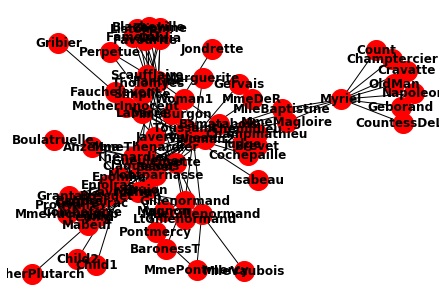

In [0]:
import networkx as nx
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)
  nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

以下のプログラムではNetworkXに実装された以下の6つの可視化手法の例を示している。先のプログラムと同じように、実行すると入力ファイルの選択を求められるので、lesmis.gmlファイルを選択すると、可視化が行われる。

*   draw_circular	(頂点を円周上に配置) (上段左)
*   draw_kamada_kawai (頂点を力学モデルにより配置) (上段中央)
*   draw_random (頂点をランダムに配置) (上段右)
*   draw_spectral (ネットワークを表す行列の固有ベクトルにより頂点を配置) (下段左)
*   draw_spring (頂点を力学モデルにより配置) (下段中央)
*   draw_shell (頂点を同心円上に配置) (下段右)


Saving lesmis.gml to lesmis (1).gml
User uploaded file "lesmis.gml" with length 17610 bytes


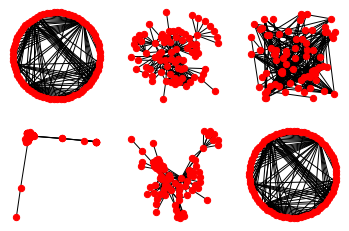

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)

plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(233)
nx.draw_random(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(234)
nx.draw_spectral(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(235)
nx.draw_spring(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(236)
nx.draw_shell(G, node_size=40, node_color='red', with_labels=False)

2.3 ランキング・中心性

ネットワークにおいて、どの頂点が中心的であるかを知りたいことは多い。例えばソーシャルメディアにおいて口コミ情報を広めるためのキーパーソンを見つけたり、街のどこへでも短時間で駆けつけられるような場所を探したり、その人が欠けるとネットワークがバラバラになってしまうような人を見つけたりなど、対象とするネットワークによってさまざまな中心性が考えられる。

以下のプログラムでは、Les Miserablesネットワークの頂点の4種類の中心性をヒートマップで示している。中心性が高い頂点ほど明るい色で表示されている。可視化においては、https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html のサイトを参考にしている。

(1)次数中心性(Degree Centrality)
(2)固有ベクトル中心性(Eigenvector Centrality)
(3)近接中心性(Closeness Centrality)
(4)媒介中心性(Betweenness Centrality)

(1)の次数中心性は他の多くの頂点とつながっている頂点を中心的とみなすものである。(2)の固有ベクトル中心性は周囲の頂点の中心性も加味し、多くの中心的な頂点とつながっている頂点を中心的とみなしている。(3)の近接中心性はネットワーク中の他の頂点へ短い距離で到達できる頂点を中心的とみなす。(4)の媒介中心性は、その頂点がなくなると多くの経路が分断されてしまうような頂点を中心的とみなしている。

Saving lesmis.gml to lesmis (2).gml
User uploaded file "lesmis.gml" with length 17610 bytes


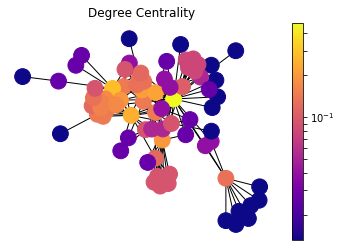

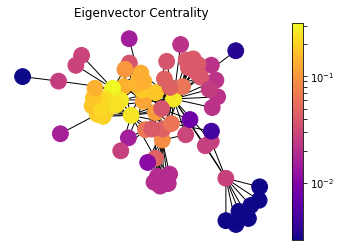

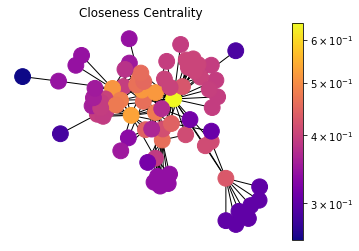

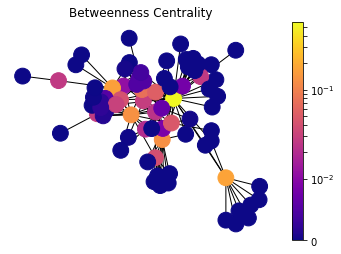

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_h(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

import numpy as np
import numpy.linalg as LA
from pprint import pprint
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)

pos = nx.spring_layout(G)

draw_h(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')


2.4 ネットワークの特徴量の計算

頂点の数や辺の数が同じであったとしても、さまざまな構造のネットワークが考えられる。以下に示すものはいずれも頂点の数が10のネットワークである。左上から順に、(1)ランダムグラフ、(2)Petersenグラフ、(3)サイクルグラフ、(4)完全グラフ、(5)完全2部グラフ、(6)barbellグラフ、(7)starグラフ、(8)wheelグラフ、(9)Barabasi-Albertモデルによるグラフを示している。



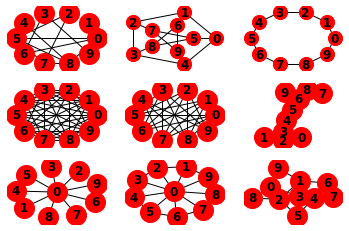

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
rnd = nx.gnp_random_graph(10,0.3)
plt.subplot(331)
nx.draw_circular(rnd, node_size=400, node_color='red', with_labels=True, font_weight='bold')

petersen = nx.petersen_graph()
plt.subplot(332)
nx.draw_shell(petersen, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

cycle = nx.cycle_graph(10)
plt.subplot(333)
nx.draw_circular(cycle, node_size=200, node_color='red', with_labels=True, font_weight='bold')

K_10 = nx.complete_graph(10)
plt.subplot(334)
nx.draw_circular(K_10, node_size=400, node_color='red', with_labels=True, font_weight='bold')

K_5_5 = nx.complete_bipartite_graph(5, 5)
plt.subplot(335)
nx.draw_circular(K_5_5, nlist=[range(5, 10), range(5)], node_size=400, node_color='red', with_labels=True, font_weight='bold')

barbell = nx.barbell_graph(4, 2)
plt.subplot(336)
nx.draw_spring(barbell, node_size=400, node_color='red', with_labels=True, font_weight='bold')

star = nx.star_graph(9)
plt.subplot(337)
nx.draw(star, node_size=400, node_color='red', with_labels=True, font_weight='bold')

wheel = nx.wheel_graph(10)
plt.subplot(338)
nx.draw(wheel, node_size=400, node_color='red', with_labels=True, font_weight='bold')

ba = nx.barabasi_albert_graph(10, 2)
plt.subplot(339)
nx.draw_spring(ba, node_size=400, node_color='red', with_labels=True, font_weight='bold')

頂点の数や辺の数の他にも、ネットワークの構造を表す特徴量が数多く提案されている。ネットワークを比較・分類したり、ネットワーク上の情報伝搬などの振舞いを理解する上で、そのような特徴量は重要である。例えばクラスタ係数は「ある人の友人2人が友人同士である割合」を表す特徴量であるが、社会ネットワークではその値が大きく、逆に電力網ネットワークなどでは小さいという性質がある。 以下の例では、各ネットワークの密度とクラスタ係数を示している。この他の特徴量としては、平均次数、平均パス長、assortativity(次数相関)などがあげられる。
 


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


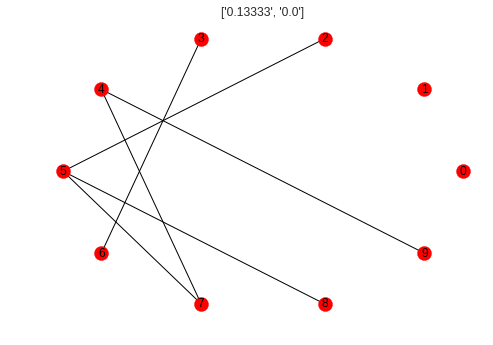

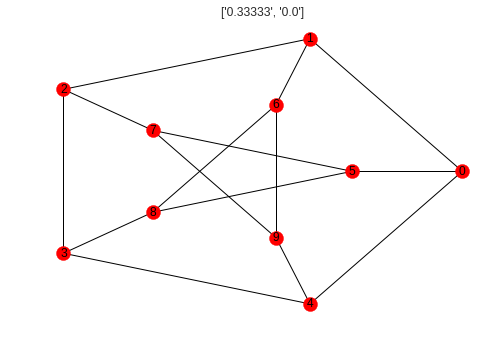

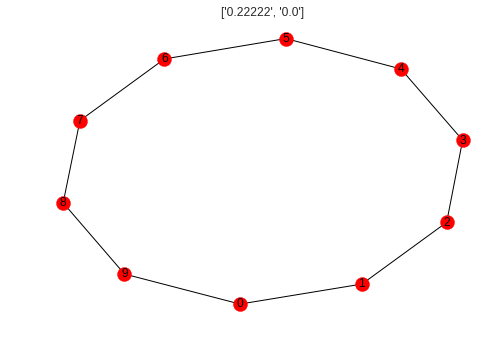

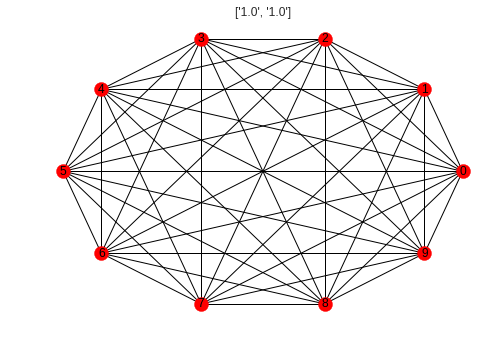

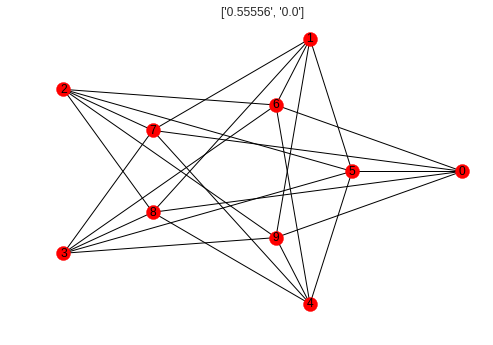

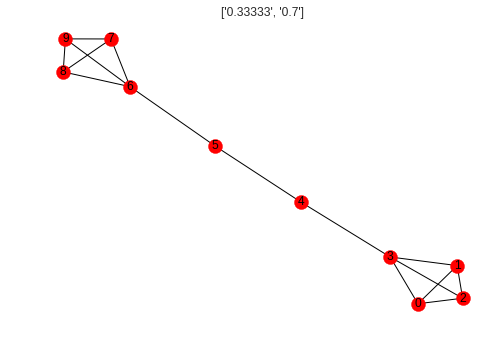

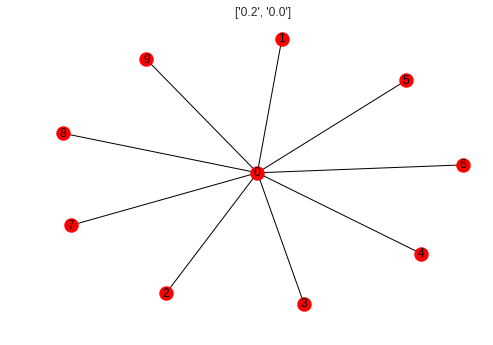

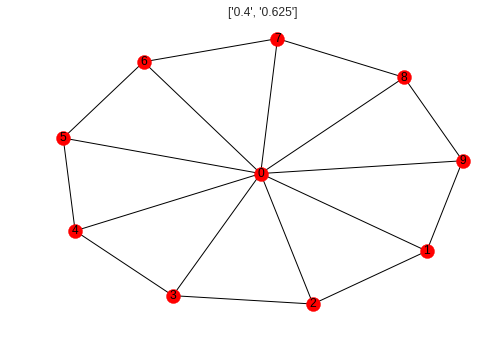

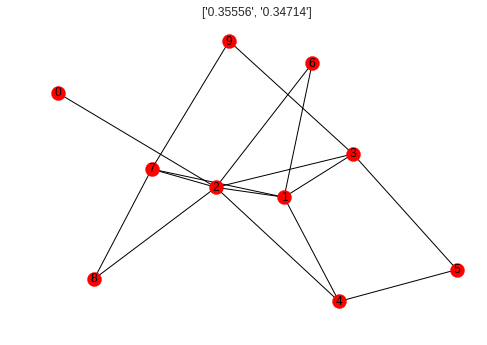

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_m(G, pos):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)     
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(['{:.5}'.format(nx.density(G)), '{:.5}'.format(nx.average_clustering(G))])
    plt.axis('off')
    plt.show()

rnd = nx.gnp_random_graph(10,0.1)
pos = nx.circular_layout(rnd)
draw_m(rnd, pos)

petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5, 10), range(5)])
draw_m(petersen, pos)

cycle = nx.cycle_graph(10)
pos = nx.spring_layout(cycle)
draw_m(cycle, pos)

K_10 = nx.complete_graph(10)
pos = nx.circular_layout(K_10)
draw_m(K_10, pos)

K_5_5 = nx.complete_bipartite_graph(5, 5)
pos = nx.shell_layout(K_5_5, nlist=[range(5, 10), range(5)])
draw_m(K_5_5, pos)

barbell = nx.barbell_graph(4, 2)
pos = nx.spring_layout(barbell)
draw_m(barbell, pos)

star = nx.star_graph(9)
pos = nx.spring_layout(star)
draw_m(star, pos)

wheel = nx.wheel_graph(10)
pos = nx.spring_layout(wheel)
draw_m(wheel, pos)

ba = nx.barabasi_albert_graph(10, 2)
pos = nx.spring_layout(ba)
draw_m(ba, pos)

2.5 コミュニティ抽出

多くのネットワークにおいては、例えば社会ネットワークにおける友人グループなどのように、密に結びついた頂点集合が含まれていることが多い。このような密な部分ネットワークのことをコミュニティと呼ぶ。社会ネットワークにおけるコミュニティは、友人グループや派閥などに対応すると考えられる。類似した頂点がコミュニティを構成することが多いことから、例えば嗜好の似ている人々に商品やサービスを推薦するなどの情報推薦にもコミュニティ抽出は有用である。与えられたネットワークからコミュニティを抽出(検出)するための研究は多くの研究者によって盛んに行われている。

Les Miserableのネットワークを対象としたコミュニティ抽出の一例を以下に示す。ネットワークの分割の良さを表すモジュラリティと呼ばれる指標に基づくものであり、その値を最大にするようなネットワーク分割を求めるものである。以下のプログラムでは、GMLフォーマットのネットワークを入力とし、得られたコミュニティ構造を色分けして表示している。プログラムを実行すると、入力ファイルの選択を求められるので、lesmis.gmlファイルを選択すると、同じコミュニティに属する頂点が同じ色で表示され、密に結びついた頂点集合がコミュニティとして抽出されていることが分かる。

Saving lesmis.gml to lesmis (3).gml
User uploaded file "lesmis.gml" with length 17610 bytes


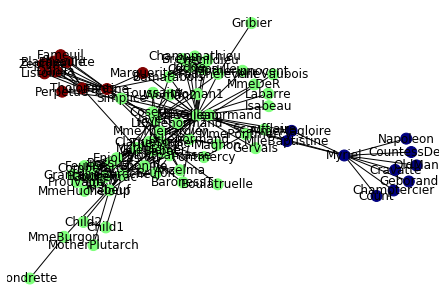

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd
import numpy as np

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
carac['myvalue']=pd.Categorical(carac['myvalue'])
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = carac['myvalue'], node_size=120, with_labels=True)


2.6 出力

ネットワーク分析における出力としては、以下のものなどがある。

(1)ネットワークのデータフォーマットの変換
(2)ネットワーク構造の可視化結果の出力
(3)ネットワークの特徴量やコミュニティ抽出などの分析結果の出力

(1)は例えばネットワークの辺リストから、隣接行列などの形式に変換するなどが考えられる。ネットワークのデータフォーマットとしては、2.1節で述べたようなものがあるが、どのフォーマットで出力できるかは分析ツールによって異なっている。NetworkXでは、以下のプログラムで示した隣接行列や辺リストの他に、GEXF、GML、GraphMLなどのフォーマットでの出力が可能である。

(2)は可視化したネットワーク構造を画像として出力するものである。matplotlibのsavefigではpng、pdf、ps、eps、svgなどのフォーマットで保存できる。

(3)はネットワークの特徴量、頂点の中心性やランキング、コミュニティ抽出の結果など分析の内容によってさまざまである。Google Colaboratoryでは画面上に結果を表示する他、使用しているパソコン上にローカルにファイルを保存したり、Googleドライブ上に保存したりすることができる。

以下のプログラムを実行すると、入力ファイルの選択を求められるので、lesmis.gmlファイルを選択すると、入力したネットワークを可視化し、その可視化した画像をpngファイルとしてローカルにも保存する。

Saving lesmis.gml to lesmis (4).gml
User uploaded file "lesmis.gml" with length 17610 bytes


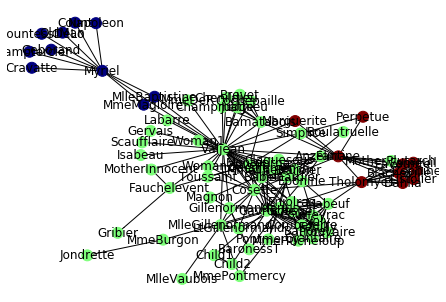

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd
import numpy as np

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
carac['myvalue']=pd.Categorical(carac['myvalue'])
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = carac['myvalue'], node_size=120, with_labels=True)

plt.savefig("lesmis.png")
files.download("lesmis.png") 


networkXでグラフをGEXF形式で出力し、Gephiを使ってさらに分析することもできる。
Gephiはユーザインタフェースが優れており、頂点や辺の色やサイズ・太さ、可視化のレイアウトなどをインタラクティブに変更できる。あらかじめ自分のPC上にGephiをインストールしておく必要がある。

Saving lesmis.gml to lesmis (6).gml
User uploaded file "lesmis.gml" with length 17610 bytes


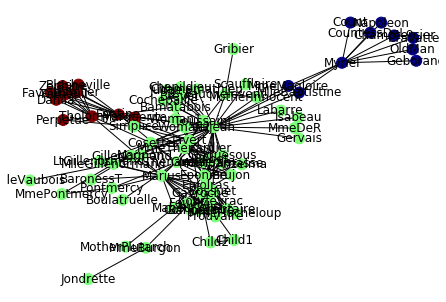

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd
import numpy as np

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
carac['myvalue']=pd.Categorical(carac['myvalue'])
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = carac['myvalue'], node_size=120, with_labels=True)

str = ''.join(nx.generate_gexf(G))
with open('lesmis.gexf', 'w') as f:
  f.write(str)

files.download('lesmis.gexf')

#plt.savefig("lesmis.png")
#files.download("lesmis.png")